In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Load Data

In [2]:
engage = pd.read_pickle("engagement")
engage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [3]:
subs = pd.read_pickle("subscribers")
subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [4]:
reps= pd.read_pickle('customer_service_reps')
reps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB


In [5]:
channel= pd.read_csv('channel_spend_graduate.csv')
channel

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [6]:
channel['channel'].value_counts()

bing        8
display     8
facebook    8
search      8
youtube     8
Name: channel, dtype: int64

# Segmentation

mainly using subscribers' info to do segmentation

## Data preprocessing

In [7]:
subsclean = subs
subsclean.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [8]:
subsclean.isnull().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
retarget_TF                          0
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
creation_until_cancel_days       75860
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                      34904
join_fee                         34904
language                 

we have to deal with null values in 10 columns

In [9]:
subsclean['package_type'].fillna('not mentioned', inplace = True)
subsclean['num_weekly_services_utilized'].fillna(0, inplace = True)
subsclean['preferred_genre'].fillna('not mentioned', inplace = True)
subsclean['intended_use'].fillna('not mentioned', inplace = True)
subsclean['weekly_consumption_hour'].fillna(0, inplace = True)
subsclean['num_ideal_streaming_services'].fillna(0, inplace = True)
subsclean['male_TF'].fillna('not mentioned', inplace = True)
subsclean['attribution_survey'].fillna('not mentioned', inplace = True)
subsclean['op_sys'].fillna('not mentioned', inplace = True)
subsclean['creation_until_cancel_days'].fillna(0, inplace = True)
subsclean['revenue_net'].fillna(0, inplace = True)
subsclean['join_fee'].fillna(0, inplace = True)
subsclean['payment_type'].fillna('not mentioned', inplace = True)
#age will be processed in later steps
subsclean.isnull().sum()

subid                               0
package_type                        0
num_weekly_services_utilized        0
preferred_genre                     0
intended_use                        0
weekly_consumption_hour             0
num_ideal_streaming_services        0
retarget_TF                         0
age                             35169
male_TF                             0
country                             0
attribution_technical               0
attribution_survey                  0
op_sys                              0
months_per_bill_period              0
plan_type                           0
monthly_price                       0
discount_price                      0
account_creation_date               0
creation_until_cancel_days          0
cancel_before_trial_end             0
trial_end_date                      0
initial_credit_card_declined        0
revenue_net                         0
join_fee                            0
language                            0
paid_TF     

In [10]:
subsclean['age'].value_counts()
# subscribers with age greater than 100 will be dropped, while null will be substituted with average age.
averageage = subsclean.age[subsclean['age'] <= 100].sum()/191571
subsclean['age'].fillna(averageage, inplace = True)
subsclean.isnull().sum()

subid                           0
package_type                    0
num_weekly_services_utilized    0
preferred_genre                 0
intended_use                    0
weekly_consumption_hour         0
num_ideal_streaming_services    0
retarget_TF                     0
age                             0
male_TF                         0
country                         0
attribution_technical           0
attribution_survey              0
op_sys                          0
months_per_bill_period          0
plan_type                       0
monthly_price                   0
discount_price                  0
account_creation_date           0
creation_until_cancel_days      0
cancel_before_trial_end         0
trial_end_date                  0
initial_credit_card_declined    0
revenue_net                     0
join_fee                        0
language                        0
paid_TF                         0
refund_after_trial_TF           0
payment_type                    0
dtype: int64

abnormal values will then all be dropped

In [11]:
subsclean.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,227628.000000,227628.000000,227628.000000,2.276280e+05,227628.0,227628.000000,227628.000000,227628.000000,227628.000000,227628.000000
mean,2.498624e+07,1.543598,23.332421,1.014367,6.479984e+02,4.0,4.732049,4.512188,11.048386,1.318552,0.097489
std,2.885543e+06,1.592010,11.379402,1.015490,1.765648e+05,0.0,0.101049,0.097078,30.240349,2.878973,0.168040
min,2.000001e+07,0.000000,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,0.000000,22.951579,0.000000,3.700000e+01,4.0,4.734300,4.514100,0.000000,0.000000,0.000000
50%,2.497011e+07,2.158123,25.851492,1.730242,4.615956e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
75%,2.749020e+07,2.773761,30.201361,1.910251,5.500000e+01,4.0,4.734300,4.514100,11.000000,0.000000,0.036700
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [12]:
subsclean = subsclean[subsclean['age'] <= 100]
subsclean = subsclean[subsclean['creation_until_cancel_days'] >= 0]
subsclean = subsclean[subsclean['join_fee'] >= 0]
subsclean = subsclean[subsclean['weekly_consumption_hour'] > 0]
subsclean = subsclean[subsclean['num_ideal_streaming_services'] >= 0]
subsclean = subsclean[subsclean['num_weekly_services_utilized'] > 0]
subsclean.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,1.152580e+05,115258.000000,115258.000000,115258.000000,115258.000000,115258.0,115258.000000,115258.000000,115258.000000,115258.000000,115258.000000
mean,2.499166e+07,2.999062,27.989451,1.993749,45.554645,4.0,4.734824,4.514848,10.878021,2.026487,0.114249
std,2.881897e+06,0.748603,4.787257,0.272731,13.290146,0.0,0.015511,0.021260,27.976977,3.339131,0.177053
min,2.000001e+07,0.049049,1.202235,0.000000,0.000000,4.0,4.000300,3.780100,0.000000,-5.651800,0.000000
25%,2.249017e+07,2.493926,24.401536,1.867080,35.000000,4.0,4.734300,4.514100,0.000000,0.000000,0.036700
50%,2.498585e+07,2.761979,27.301448,1.907680,45.000000,4.0,4.734300,4.514100,5.000000,0.000000,0.036700
75%,2.748541e+07,3.274516,30.201361,1.953319,55.000000,4.0,4.734300,4.514100,11.000000,4.587500,0.110100
max,2.999982e+07,14.335378,76.599962,6.955714,100.000000,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [13]:
subsclean.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,not mentioned
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,not mentioned
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,0.0,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,0.0,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
681969,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,...,4.0,False,2020-02-05,False,0.0000,0.3303,ar,False,False,not mentioned


### getting dataframe with only features used in segmentation

In [14]:
seg = subsclean[['package_type','num_weekly_services_utilized','preferred_genre',
                'intended_use','weekly_consumption_hour','num_ideal_streaming_services','age','male_TF', 
                'op_sys']]            

### using get dummies to deal with features

In [15]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115258 entries, 496617 to 229587
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  115258 non-null  object 
 1   num_weekly_services_utilized  115258 non-null  float64
 2   preferred_genre               115258 non-null  object 
 3   intended_use                  115258 non-null  object 
 4   weekly_consumption_hour       115258 non-null  float64
 5   num_ideal_streaming_services  115258 non-null  float64
 6   age                           115258 non-null  float64
 7   male_TF                       115258 non-null  object 
 8   op_sys                        115258 non-null  object 
dtypes: float64(4), object(5)
memory usage: 8.8+ MB


In [16]:
seg_new = pd.get_dummies(seg, columns = ['package_type','preferred_genre','intended_use','male_TF', 'op_sys'])

In [17]:
seg_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115258 entries, 496617 to 229587
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   num_weekly_services_utilized              115258 non-null  float64
 1   weekly_consumption_hour                   115258 non-null  float64
 2   num_ideal_streaming_services              115258 non-null  float64
 3   age                                       115258 non-null  float64
 4   package_type_base                         115258 non-null  uint8  
 5   package_type_economy                      115258 non-null  uint8  
 6   package_type_enhanced                     115258 non-null  uint8  
 7   package_type_not mentioned                115258 non-null  uint8  
 8   preferred_genre_comedy                    115258 non-null  uint8  
 9   preferred_genre_drama                     115258 non-null  uint8  
 10  preferred_genre

In [18]:
seg_new = seg_new.drop('intended_use_not mentioned', axis = 1)
seg_new = seg_new.drop('preferred_genre_not mentioned', axis = 1)
seg_new = seg_new.drop('package_type_not mentioned', axis = 1)

In [19]:
seg_new

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
496617,3.362885,36.001186,1.951776,25.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
681701,3.731089,22.951579,2.506384,28.0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
192823,2.049135,20.051667,1.860289,61.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
315863,3.002048,34.551230,1.870503,23.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
681969,2.850348,28.751405,1.888272,71.0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243775,3.672180,27.301448,2.317104,44.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
378377,2.514545,30.201361,1.968236,32.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
603751,2.169904,24.401536,1.881068,43.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
509326,2.594078,28.751405,1.905485,38.0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1


### normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_name = list(seg_new.columns.values.tolist())
seg_norm = pd.DataFrame(scaler.fit_transform(seg_new), columns = col_name)
seg_norm

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
0,0.231959,0.461538,0.280600,0.25,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.257732,0.288462,0.360335,0.28,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.140000,0.250000,0.267448,0.61,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.206701,0.442308,0.268916,0.23,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.196082,0.365385,0.271471,0.71,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115253,0.253608,0.346154,0.333122,0.44,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
115254,0.172577,0.384615,0.282967,0.32,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
115255,0.148453,0.307692,0.270435,0.43,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
115256,0.178144,0.365385,0.273945,0.38,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(seg_norm) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.721044,0.911717
1,-0.464211,-0.443424
2,1.096177,-0.777052
3,-0.195277,-0.795730
4,0.842412,0.849817


### Fitting Kmean

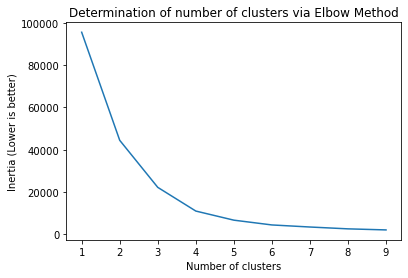

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_principal)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('Determination of number of clusters via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Lower is better)')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(X_principal)
print(silhouette_score(X_principal, kmeans.labels_, metric='euclidean'))

0.636710725794713


In [24]:
label = kmeans.labels_
center = kmeans.cluster_centers_
seg_new['labels']=kmeans.labels_
seg_new.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,...,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS,labels
496617,3.362885,36.001186,1.951776,25.0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,3
681701,3.731089,22.951579,2.506384,28.0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
192823,2.049135,20.051667,1.860289,61.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,2
315863,3.002048,34.551230,1.870503,23.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
681969,2.850348,28.751405,1.888272,71.0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0


## Plots

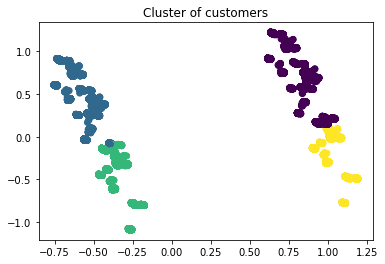

In [25]:
plt.scatter(X_principal['P1'], X_principal['P2'],   
           c = KMeans(n_clusters = 4).fit_predict(X_principal)) 
plt.title('Cluster of customers')
plt.show() 

In [26]:
avg_seg = seg_new.groupby(['labels'], as_index=False).mean()
avg_seg = avg_seg.rename(columns={"labels":"Cluster"})
avg_seg['Cluster'] +=1
avg_seg.head()

,Cluster,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,...,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
0,1,3.122430,27.976256,2.035485,45.349049,0.110192,0.111708,0.449959,0.339858,0.221487,...,0.050041,0.111938,0.145161,0.035429,0.331311,0.094890,0.877998,0.122002,1.0,0.0
1,2,2.959155,27.990489,1.974238,46.752366,0.921915,0.078085,0.000000,0.614764,0.256507,...,0.000543,0.001413,0.001630,0.031163,0.321198,0.127262,0.877466,0.122534,0.0,1.0
2,3,3.107112,27.857599,2.026374,46.765263,0.944805,0.055195,0.000000,0.704672,0.196925,...,0.000760,0.001579,0.001929,0.040168,0.204116,0.161434,0.880957,0.119043,1.0,0.0
3,4,2.921664,28.052705,1.974850,44.031055,0.000000,0.072625,0.556319,0.414959,0.124536,...,0.051987,0.144921,0.152121,0.034683,0.281658,0.103847,0.886528,0.113472,0.0,1.0


In [27]:
seg_new['labels'].value_counts()

3    39587
1    36806
0    21762
2    17103
Name: labels, dtype: int64

In [28]:
label1 = seg_new[seg_new['labels'] ==0]
label2 = seg_new[seg_new['labels'] ==1]
label3 = seg_new[seg_new['labels'] ==2]
label4 = seg_new[seg_new['labels'] ==3]
label1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21762 entries, 681969 to 60056
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num_weekly_services_utilized              21762 non-null  float64
 1   weekly_consumption_hour                   21762 non-null  float64
 2   num_ideal_streaming_services              21762 non-null  float64
 3   age                                       21762 non-null  float64
 4   package_type_base                         21762 non-null  uint8  
 5   package_type_economy                      21762 non-null  uint8  
 6   package_type_enhanced                     21762 non-null  uint8  
 7   preferred_genre_comedy                    21762 non-null  uint8  
 8   preferred_genre_drama                     21762 non-null  uint8  
 9   preferred_genre_international             21762 non-null  uint8  
 10  preferred_genre_other        

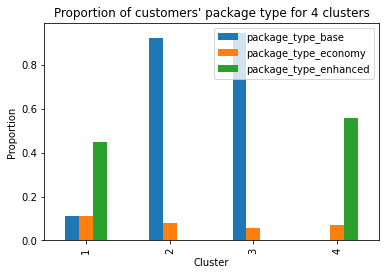

In [29]:
avg_seg.plot(x="Cluster", y=['package_type_base', 'package_type_economy', 'package_type_enhanced'], kind="bar")
plt.title("Proportion of customers' package type for 4 clusters")
plt.ylabel("Proportion")
plt.show()

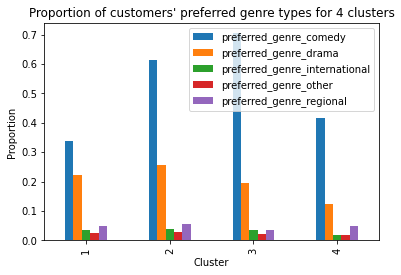

In [30]:
avg_seg.plot(x="Cluster", y=['preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international','preferred_genre_other','preferred_genre_regional'], kind="bar")
plt.title("Proportion of customers' preferred genre types for 4 clusters")
plt.ylabel("Proportion")
plt.show()

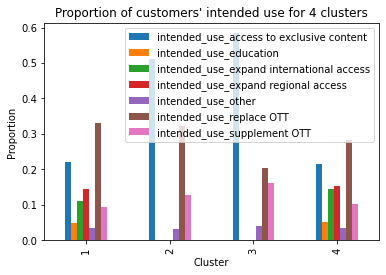

In [31]:
avg_seg.plot(x="Cluster", 
             y=['intended_use_access to exclusive content', 'intended_use_education', 'intended_use_expand international access',
                'intended_use_expand regional access','intended_use_other','intended_use_replace OTT',
                'intended_use_supplement OTT'], kind="bar")
plt.title("Proportion of customers' intended use for 4 clusters")
plt.ylabel("Proportion")
plt.show()

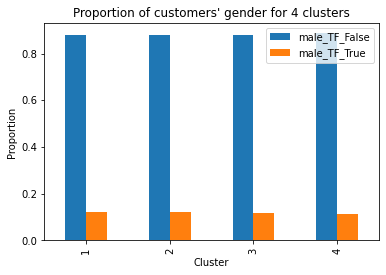

In [32]:
avg_seg.plot(x="Cluster", 
             y=['male_TF_False', 'male_TF_True'], kind="bar")
plt.title("Proportion of customers' gender for 4 clusters")
plt.ylabel("Proportion")
plt.show()

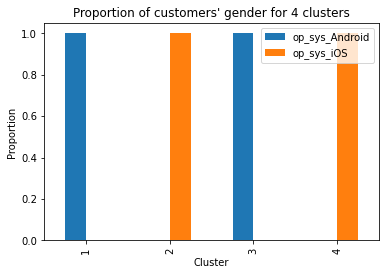

In [33]:
avg_seg.plot(x="Cluster", 
             y=['op_sys_Android', 'op_sys_iOS'], kind="bar")
plt.title("Proportion of customers' gender for 4 clusters")
plt.ylabel("Proportion")
plt.show()

/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='age', ylabel='Density'>

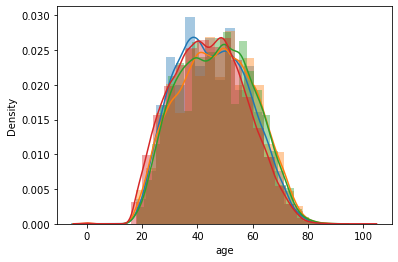

In [34]:
sns.distplot(label1['age'],bins=25) # blue
sns.distplot(label2['age'],bins=25) # orange
sns.distplot(label3['age'],bins=25) # green
sns.distplot(label4['age'],bins=25) # red

/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='num_weekly_services_utilized', ylabel='Density'>

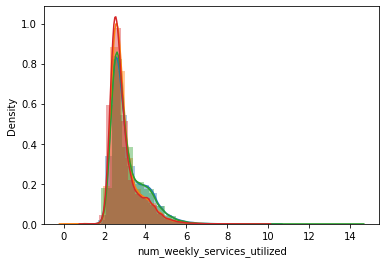

In [35]:
sns.distplot(label1['num_weekly_services_utilized'],bins=25) # blue
sns.distplot(label2['num_weekly_services_utilized'],bins=25) # orange
sns.distplot(label3['num_weekly_services_utilized'],bins=25) # green
sns.distplot(label4['num_weekly_services_utilized'],bins=25) # red

/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='num_ideal_streaming_services', ylabel='Density'>

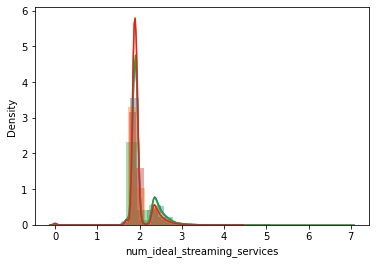

In [36]:
sns.distplot(label1['num_ideal_streaming_services'],bins=25) # blue
sns.distplot(label2['num_ideal_streaming_services'],bins=25) # orange
sns.distplot(label3['num_ideal_streaming_services'],bins=25) # green
sns.distplot(label4['num_ideal_streaming_services'],bins=25) # red

# Attribution and Allocation

### Data preprocessing

In [37]:
subs['attribution_technical'].isnull().sum()

0

In [38]:
subs['attribution_survey'].isnull().sum()

0

In [39]:
# though both features contain zero null items, attribution_technical will be taken into account since 
# subscribers may not treat compulsory survey seriously.
subs.info() # values under acount creation date and attribution_technical will be used to calculate CAC

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  227628 non-null  object        
 2   num_weekly_services_utilized  227628 non-null  float64       
 3   preferred_genre               227628 non-null  object        
 4   intended_use                  227628 non-null  object        
 5   weekly_consumption_hour       227628 non-null  float64       
 6   num_ideal_streaming_services  227628 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           227628 non-null  float64       
 9   male_TF                       227628 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [40]:
attri = subs.loc[:,['subid','attribution_technical','account_creation_date']]
attri.head()

,subid,attribution_technical,account_creation_date
162502,21724479,facebook,2020-01-24 21:44:16
380374,23383224,facebook,2020-03-01 15:44:35
496617,26844789,organic,2019-12-07 16:37:06
356799,29417030,search,2020-01-27 16:09:32
681701,26723159,discovery,2019-10-05 12:57:07


In [41]:
# extract just year and month from account creation date
attri['date'] = attri['account_creation_date'].dt.strftime('%Y-%m')
attri.head()

,subid,attribution_technical,account_creation_date,date
162502,21724479,facebook,2020-01-24 21:44:16,2020-01
380374,23383224,facebook,2020-03-01 15:44:35,2020-03
496617,26844789,organic,2019-12-07 16:37:06,2019-12
356799,29417030,search,2020-01-27 16:09:32,2020-01
681701,26723159,discovery,2019-10-05 12:57:07,2019-10


In [42]:
channel.value_counts()

channel   date    spend_AED
bing      201907  400          1
          201908  900          1
facebook  202001  11000        1
          202002  14000        1
search    201907  13000        1
          201908  18500        1
          201909  19000        1
          201910  24000        1
          201911  25000        1
          201912  38000        1
          202001  41000        1
          202002  44000        1
youtube   201907  90           1
          201908  180          1
          201909  100          1
          201910  130          1
          201911  550          1
          201912  900          1
          202001  4360         1
facebook  201912  16000        1
          201911  23000        1
          201910  17000        1
display   201908  20           1
bing      201909  1000         1
          201910  1100         1
          201911  1300         1
          201912  300          1
          202001  2100         1
          202002  3700         1
display   20190

In [43]:
# extract those from channels we are investing.
facebook = attri[attri['attribution_technical'] =='facebook']
bing = attri[attri['attribution_technical'] =='bing']
search = attri[attri['attribution_technical'] =='search']
youtube = attri[attri['attribution_technical'] =='youtube']
display = attri[attri['attribution_technical'] =='display']

In [44]:
facebook

,subid,attribution_technical,account_creation_date,date
162502,21724479,facebook,2020-01-24 21:44:16,2020-01
380374,23383224,facebook,2020-03-01 15:44:35,2020-03
254782,24930568,facebook,2020-02-23 17:50:25,2020-02
377093,23163827,facebook,2019-08-16 23:56:50,2019-08
143042,26874196,facebook,2020-03-09 03:09:57,2020-03
...,...,...,...,...
324200,24317364,facebook,2019-08-23 13:08:31,2019-08
230734,21928274,facebook,2020-01-14 02:04:52,2020-01
509326,21434712,facebook,2019-11-17 14:12:33,2019-11
281340,24799085,facebook,2019-12-21 19:40:44,2019-12


In [45]:
facebook = facebook.sort_values(by=['date'])

In [46]:
facebook['date'].value_counts()
#bing['date'].value_counts()
#search['date'].value_counts()
#youtube['date'].value_counts()
#display['date'].value_counts()

2019-11    12995
2019-07    10011
2019-08     9855
2019-10     9489
2019-12     9288
2020-02     7988
2020-03     6889
2020-01     6289
2019-09     6129
2019-06     1318
Name: date, dtype: int64

In [47]:
monthattri = pd.DataFrame()
monthattri['date'] = facebook['date'].unique()
monthattri['facebook'] = [1318,10011,9855,6129,9489,12995,9288,6289,7988,6889]
monthattri['bing'] = [7,120,71,84,86,103,28,172,303,172]
monthattri['search'] = [108,1328,1939,1852,2333,2510,3770,4073,4300,3093]
monthattri['youtube'] = [1,8,15,2,11,47,76,370,205,178]
monthattri['display'] = [3,44,74,12,50,90,112,536,341,145]
monthattri

,date,facebook,bing,search,youtube,display
0,2019-06,1318,7,108,1,3
1,2019-07,10011,120,1328,8,44
2,2019-08,9855,71,1939,15,74
3,2019-09,6129,84,1852,2,12
4,2019-10,9489,86,2333,11,50
5,2019-11,12995,103,2510,47,90
6,2019-12,9288,28,3770,76,112
7,2020-01,6289,172,4073,370,536
8,2020-02,7988,303,4300,205,341
9,2020-03,6889,172,3093,178,145


In [48]:
sb = channel[channel['channel'] == 'bing'].reset_index(drop = True)
sf = channel[channel['channel'] == 'facebook'].reset_index(drop = True)
ss = channel[channel['channel'] == 'search'].reset_index(drop = True)
sy = channel[channel['channel'] == 'youtube'].reset_index(drop = True)
sd = channel[channel['channel'] == 'display'].reset_index(drop = True)

In [49]:
monthattri = monthattri.drop(index=[0,9]).reset_index(drop = True)

In [50]:
monthattri['facebookspending'] = sf['spend_AED']
monthattri['bingspending'] = sb['spend_AED']
monthattri['searchspending'] = ss['spend_AED']
monthattri['youtubespending'] = sy['spend_AED']
monthattri['displayspending'] = sd['spend_AED']
monthattri

,date,facebook,bing,search,youtube,display,facebookspending,bingspending,searchspending,youtubespending,displayspending
0,2019-07,10011,120,1328,8,44,9000,400,13000,90,12
1,2019-08,9855,71,1939,15,74,13000,900,18500,180,20
2,2019-09,6129,84,1852,2,12,10500,1000,19000,100,13
3,2019-10,9489,86,2333,11,50,17000,1100,24000,130,19
4,2019-11,12995,103,2510,47,90,23000,1300,25000,550,29
5,2019-12,9288,28,3770,76,112,16000,300,38000,900,31
6,2020-01,6289,172,4073,370,536,11000,2100,41000,4360,148
7,2020-02,7988,303,4300,205,341,14000,3700,44000,2420,94


In [51]:
CAC = pd.DataFrame()
CAC['date'] = monthattri['date']
CAC['facebook'] = monthattri['facebookspending']/monthattri['facebook']
CAC['bing'] = monthattri['bingspending']/monthattri['bing']
CAC['search'] = monthattri['searchspending']/monthattri['search']
CAC['youtube'] = monthattri['youtubespending']/monthattri['youtube']
CAC['display'] = monthattri['displayspending']/monthattri['display']
CAC

,date,facebook,bing,search,youtube,display
0,2019-07,0.899011,3.333333,9.789157,11.250000,0.272727
1,2019-08,1.319127,12.676056,9.541001,12.000000,0.270270
2,2019-09,1.713167,11.904762,10.259179,50.000000,1.083333
3,2019-10,1.791548,12.790698,10.287184,11.818182,0.380000
4,2019-11,1.769912,12.621359,9.960159,11.702128,0.322222
5,2019-12,1.722653,10.714286,10.079576,11.842105,0.276786
6,2020-01,1.749086,12.209302,10.066290,11.783784,0.276119
7,2020-02,1.752629,12.211221,10.232558,11.804878,0.275660


In [52]:
ACAC = CAC.mean().reset_index()
ACAC

/var/folders/5z/501d0fg51hjbmhdstqh8c9900000gn/T/ipykernel_59784/2453904223.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ACAC = CAC.mean().reset_index()


,index,0
0,facebook,1.589642
1,bing,11.057627
2,search,10.026888
3,youtube,16.525135
4,display,0.394640


In [53]:
Attribution2= monthattri

In [54]:
Attribution2.loc['total']= Attribution2.sum(numeric_only=True, axis=0)

In [55]:
Attribution2.loc['total']

date                     NaN
facebook             72044.0
bing                   967.0
search               22105.0
youtube                734.0
display               1259.0
facebookspending    113500.0
bingspending         10800.0
searchspending      222500.0
youtubespending       8730.0
displayspending        366.0
Name: total, dtype: object

In [56]:
ACAC2 = pd.DataFrame()
ACAC2['channel'] = ['facebook','bing','search','youtube', 'display']
ACAC2['total attribution'] = [72044,967, 22105, 734, 1259]
ACAC2['total spending'] = [113500, 10800, 222500, 8730, 366]
ACAC2['Avg CAC'] = ACAC2['total spending']/ACAC2['total attribution']

In [57]:
ACAC2

,channel,total attribution,total spending,Avg CAC
0,facebook,72044,113500,1.575426
1,bing,967,10800,11.168563
2,search,22105,222500,10.065596
3,youtube,734,8730,11.893733
4,display,1259,366,0.290707


# Churn

In [113]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

pd.options.display.max_columns = 25

In [114]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [115]:
subsclean.shape

(115258, 29)

In [116]:
subsclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115258 entries, 496617 to 229587
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         115258 non-null  int64         
 1   package_type                  115258 non-null  object        
 2   num_weekly_services_utilized  115258 non-null  float64       
 3   preferred_genre               115258 non-null  object        
 4   intended_use                  115258 non-null  object        
 5   weekly_consumption_hour       115258 non-null  float64       
 6   num_ideal_streaming_services  115258 non-null  float64       
 7   retarget_TF                   115258 non-null  bool          
 8   age                           115258 non-null  float64       
 9   male_TF                       115258 non-null  object        
 10  country                       115258 non-null  object        
 11  attribut

In [117]:
churnsub = subsclean.iloc[:,[0,2,3,4,5,6,8,9,13,20]].reset_index(drop=True)
churnsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115258 entries, 0 to 115257
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         115258 non-null  int64  
 1   num_weekly_services_utilized  115258 non-null  float64
 2   preferred_genre               115258 non-null  object 
 3   intended_use                  115258 non-null  object 
 4   weekly_consumption_hour       115258 non-null  float64
 5   num_ideal_streaming_services  115258 non-null  float64
 6   age                           115258 non-null  float64
 7   male_TF                       115258 non-null  object 
 8   op_sys                        115258 non-null  object 
 9   cancel_before_trial_end       115258 non-null  bool   
dtypes: bool(1), float64(4), int64(1), object(4)
memory usage: 8.0+ MB


In [118]:
churnsub['male_TF'] = churnsub['male_TF'].apply(lambda x: int(x))
churnsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115258 entries, 0 to 115257
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         115258 non-null  int64  
 1   num_weekly_services_utilized  115258 non-null  float64
 2   preferred_genre               115258 non-null  object 
 3   intended_use                  115258 non-null  object 
 4   weekly_consumption_hour       115258 non-null  float64
 5   num_ideal_streaming_services  115258 non-null  float64
 6   age                           115258 non-null  float64
 7   male_TF                       115258 non-null  int64  
 8   op_sys                        115258 non-null  object 
 9   cancel_before_trial_end       115258 non-null  bool   
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 8.0+ MB


In [119]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [120]:
churnengage = engage.iloc[:,[0,2,3,4,5,6,7]].reset_index(drop=True)
churnengage = churnengage.groupby('subid').mean().reset_index()

In [121]:
reps

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [122]:
churnreps = reps.groupby('subid', as_index=False).max(['account_creation_date','revenue_net_1month','last_payment','next_payment'])

In [123]:
churnreps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369360 entries, 0 to 1369359
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   subid                    1369360 non-null  int64  
 1   customer_service_rep_id  1369360 non-null  int64  
 2   current_sub_TF           1369360 non-null  bool   
 3   num_trial_days           1369360 non-null  int64  
 4   trial_completed_TF       1369360 non-null  bool   
 5   revenue_net_1month       1369360 non-null  float64
 6   payment_period           1369360 non-null  int64  
dtypes: bool(2), float64(1), int64(4)
memory usage: 54.8 MB


In [124]:
# take only churn status and subid for match from reps dataset
churnreps = churnreps.iloc[:,[0,2]].reset_index(drop=True)

In [125]:
churnreps['current_sub_TF'].value_counts()

False    1040049
True      329311
Name: current_sub_TF, dtype: int64

In [126]:
churn1= pd.merge(churnsub, churnengage, on=['subid']).dropna()
churn = pd.merge(churn1,churnreps,on = ['subid']).dropna()

In [127]:
churn

,subid,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,op_sys,cancel_before_trial_end,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,current_sub_TF
0,26844789,3.362885,regional,replace OTT,36.001186,1.951776,25.0,1,iOS,False,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,False
1,29726122,2.049135,comedy,access to exclusive content,20.051667,1.860289,61.0,0,Android,True,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,True
2,20299962,3.002048,drama,access to exclusive content,34.551230,1.870503,23.0,0,iOS,True,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,True
3,25393847,2.452687,regional,supplement OTT,28.751405,1.842940,57.0,0,iOS,False,2.400000,0.800000,3.600000,4.400000,0.000000,0.600000,False
4,23163827,2.876856,comedy,replace OTT,33.101274,1.867353,54.0,0,iOS,False,5.071429,0.428571,3.714286,4.857143,0.000000,0.857143,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79462,26828621,3.672180,drama,access to exclusive content,27.301448,2.317104,44.0,0,iOS,True,1.000000,0.500000,1.500000,5.500000,0.000000,0.500000,True
79463,25492551,2.514545,comedy,access to exclusive content,30.201361,1.968236,32.0,0,Android,False,1.500000,2.000000,6.000000,6.500000,0.000000,0.500000,False
79464,25835684,2.169904,drama,access to exclusive content,24.401536,1.881068,43.0,0,iOS,False,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,False
79465,21434712,2.594078,comedy,supplement OTT,28.751405,1.905485,38.0,0,iOS,False,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,False


In [128]:
correlation = churn[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services']].corr()

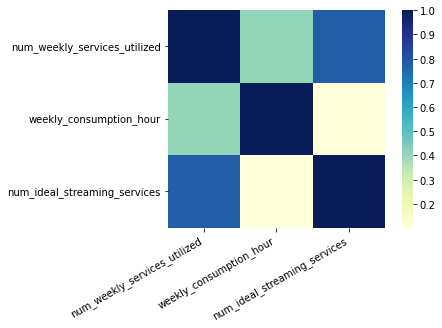

In [129]:
sns.heatmap(correlation,
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,cmap = "YlGnBu",square=True)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [130]:
churn = churn.drop('num_ideal_streaming_services',axis = 1)

In [131]:
churn = churn.rename(columns = {'current_sub_TF':'churn_TF'})

In [132]:
churn['churn_TF'] = churn['churn_TF'].apply(lambda x: int(x))

In [133]:
churn['cancel_before_trial_end'] = churn['cancel_before_trial_end'].apply(lambda x: int(x))

In [134]:
churn

,subid,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,op_sys,cancel_before_trial_end,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF
0,26844789,3.362885,regional,replace OTT,36.001186,25.0,1,iOS,0,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,0
1,29726122,2.049135,comedy,access to exclusive content,20.051667,61.0,0,Android,1,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,1
2,20299962,3.002048,drama,access to exclusive content,34.551230,23.0,0,iOS,1,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,1
3,25393847,2.452687,regional,supplement OTT,28.751405,57.0,0,iOS,0,2.400000,0.800000,3.600000,4.400000,0.000000,0.600000,0
4,23163827,2.876856,comedy,replace OTT,33.101274,54.0,0,iOS,0,5.071429,0.428571,3.714286,4.857143,0.000000,0.857143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79462,26828621,3.672180,drama,access to exclusive content,27.301448,44.0,0,iOS,1,1.000000,0.500000,1.500000,5.500000,0.000000,0.500000,1
79463,25492551,2.514545,comedy,access to exclusive content,30.201361,32.0,0,Android,0,1.500000,2.000000,6.000000,6.500000,0.000000,0.500000,0
79464,25835684,2.169904,drama,access to exclusive content,24.401536,43.0,0,iOS,0,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0
79465,21434712,2.594078,comedy,supplement OTT,28.751405,38.0,0,iOS,0,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0


In [135]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79467 entries, 0 to 79466
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subid                            79467 non-null  int64  
 1   num_weekly_services_utilized     79467 non-null  float64
 2   preferred_genre                  79467 non-null  object 
 3   intended_use                     79467 non-null  object 
 4   weekly_consumption_hour          79467 non-null  float64
 5   age                              79467 non-null  float64
 6   male_TF                          79467 non-null  int64  
 7   op_sys                           79467 non-null  object 
 8   cancel_before_trial_end          79467 non-null  int64  
 9   app_opens                        79467 non-null  float64
 10  cust_service_mssgs               79467 non-null  float64
 11  num_videos_completed             79467 non-null  float64
 12  num_videos_more_th

In [136]:
churndummy = pd.get_dummies(churn, columns = ['preferred_genre','intended_use','op_sys'])

In [137]:
churndummy.isnull().sum()

subid                                       0
num_weekly_services_utilized                0
weekly_consumption_hour                     0
age                                         0
male_TF                                     0
cancel_before_trial_end                     0
app_opens                                   0
cust_service_mssgs                          0
num_videos_completed                        0
num_videos_more_than_30_seconds             0
num_videos_rated                            0
num_series_started                          0
churn_TF                                    0
preferred_genre_comedy                      0
preferred_genre_drama                       0
preferred_genre_international               0
preferred_genre_not mentioned               0
preferred_genre_other                       0
preferred_genre_regional                    0
intended_use_access to exclusive content    0
intended_use_education                      0
intended_use_expand international 

In [138]:
df_train, df_test = model_selection.train_test_split(churndummy, test_size=0.3)

In [139]:
churndummy.columns

Index(['subid', 'num_weekly_services_utilized', 'weekly_consumption_hour',
       'age', 'male_TF', 'cancel_before_trial_end', 'app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'churn_TF', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_not mentioned', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_not mentioned',
       'intended_use_other', 'intended_use_replace OTT',
       'intended_use_supplement OTT', 'op_sys_Android', 'op_sys_iOS'],
      dtype='object')

In [152]:
df_test_y = df_test.churn_TF
df_test_x = df_test.copy()

In [148]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['num_weekly_services_utilized', 'weekly_consumption_hour',
       'age', 'male_TF','app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'preferred_genre_comedy',
       'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_not mentioned', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_not mentioned',
       'intended_use_other', 'intended_use_replace OTT',
       'intended_use_supplement OTT', 'op_sys_Android', 'op_sys_iOS']    # list of x covariates
add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())

# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     631.0
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:59:44   Log-Likelihood:                -20844.
No. Observations:               55626   AIC:                         4.174e+04
Df Residuals:                   55602   BIC:                         4.195e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/Users/suqinyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## ROC Diagram evaluatin models

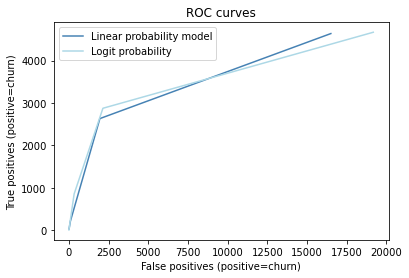

In [178]:
# ROC Diagram
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test_y, df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test_y, df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives,color="steelblue")
ax1.plot(logit_false_positives, logit_true_positives,color="lightblue")
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [154]:
subsclean['monthly_price'].value_counts()

4.7343    115055
5.1013       184
4.3673         9
4.4407         8
4.0003         2
Name: monthly_price, dtype: int64

# Sensitivity analysis

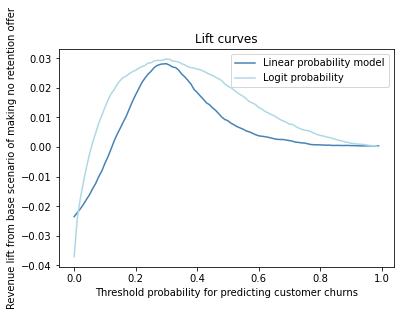

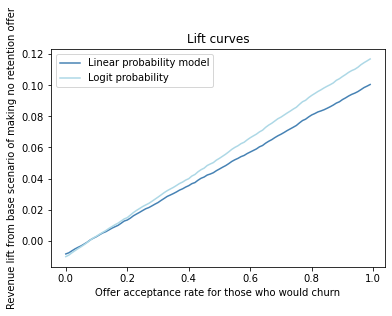

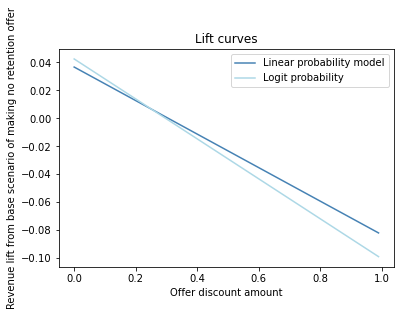

In [177]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.35
base_price = 4.73
discount_amount = 0.1
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'steelblue')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'lightblue')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'steelblue')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'lightblue')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'steelblue')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'lightblue')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [164]:
df_test

,const,subid,num_weekly_services_utilized,weekly_consumption_hour,age,male_TF,cancel_before_trial_end,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,...,prob_churn_lpm,prob_churn_logit,random_draws,price_no_offer,accept_offer_prob,would_accept_offer_rand_draw,make_offer_lpm,accept_offer_lpm,price_lpm_offer,make_offer_logit,accept_offer_logit,price_logit_offer
5549,1.0,27827453,3.186150,34.551230,39.0,1,0,1.400000,0.200000,1.500000,4.800000,0.000000,...,0.163082,0.092195,0.657740,4.73,1.0,True,False,False,4.73,False,False,4.73
54674,1.0,29605350,2.744305,25.851492,64.0,0,1,1.000000,0.486842,4.092105,4.250000,0.605263,...,0.697989,0.728460,0.801497,0.00,0.3,False,True,False,0.00,True,False,0.00
41051,1.0,24556648,2.773759,24.401536,38.0,0,0,1.500000,1.000000,2.500000,5.750000,0.000000,...,0.065749,0.014901,0.464514,4.73,1.0,True,False,False,4.73,False,False,4.73
55415,1.0,26851365,2.585241,24.401536,32.0,0,0,1.000000,0.444444,3.888889,5.111111,0.000000,...,0.119757,0.079771,0.239233,4.73,1.0,True,False,False,4.73,False,False,4.73
13244,1.0,27507300,3.259791,34.551230,54.0,0,0,1.500000,1.375000,1.500000,4.625000,0.000000,...,0.008354,0.004486,0.890971,4.73,1.0,True,False,False,4.73,False,False,4.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21639,1.0,25303711,2.921040,30.201361,68.0,0,0,1.333333,0.666667,1.666667,6.000000,0.000000,...,0.127458,0.044816,0.219589,4.73,1.0,True,False,False,4.73,False,False,4.73
43660,1.0,28539041,3.710473,34.551230,46.0,1,1,2.695652,0.434783,4.347826,4.413043,0.086957,...,0.471186,0.499573,0.941050,0.00,0.3,False,True,False,0.00,True,False,0.00
25541,1.0,20043789,2.929880,34.551230,46.0,1,1,0.676471,0.147059,1.558824,4.235294,0.000000,...,0.316390,0.310656,0.280310,4.73,1.0,True,False,False,4.73,False,False,4.73
68324,1.0,25684260,2.597023,33.101274,35.0,0,0,2.571429,0.428571,1.428571,5.285714,0.000000,...,0.088901,0.061894,0.958398,4.73,1.0,True,False,False,4.73,False,False,4.73


In [174]:
df_test['price_lpm_offer'].value_counts()

4.730    17576
0.000     3938
4.257     2327
Name: price_lpm_offer, dtype: int64